In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"


In [3]:
r= requests.get(url)

In [4]:
soup = BeautifulSoup(r.content,'html.parser')

In [5]:
table = soup.find_all('tr',class_='tcont')

In [133]:
type(table)

bs4.element.ResultSet

In [131]:
len(table)

92

In [6]:
table = table[0:93]

In [7]:
df = pd.DataFrame(columns = ['country','year','total','men','women'])


In [8]:
for r in table:
    ls = r.find_all('td')
    row = [[
    ls[0].get_text(),
    ls[1].get_text(),
    int(ls[4].get_text()),
    int(ls[7].get_text()),
    int(ls[10].get_text())]]
    row = pd.DataFrame(row,columns=['country','year','total','men','women'])
    df = df.append(row)

In [31]:
df.head(20)

,country,year,total,men,women,gdp
0,Afghanistan,2004,8.0,11.0,5.0,-0.497225
1,Albania,2004,11.0,11.0,11.0,0.387896
2,Algeria,2005,13.0,13.0,13.0,1.118481
3,Andorra,2008,11.0,11.0,12.0,0.880112
4,Anguilla,2008,11.0,11.0,11.0,-0.543974
5,Austria,2008,15.0,15.0,15.0,-0.825986
6,Azerbaijan,2008,13.0,13.0,13.0,-0.563707
7,Bahrain,2006,14.0,14.0,15.0,0.333034
8,Bangladesh,2007,8.0,8.0,8.0,1.128853
9,Belarus,2007,15.0,14.0,15.0,-0.963811


## Statistic Summary -- "Table for Years of Education"
For men, the median years of education is 12 years, while the figure for women is 13 years. The mean for men is 12.25, while the mean for women is 12.45. Years of education has bigger variability for women than for men.

In [188]:
df.describe()

,total,men,women
count,93.000000,93.000000,93.000000
mean,12.333333,12.258065,12.451613
std,3.079855,2.718308,3.826442
min,5.000000,5.000000,4.000000
25%,10.000000,11.000000,9.000000
50%,12.000000,12.000000,13.000000
75%,15.000000,14.000000,15.000000
max,19.000000,19.000000,20.000000


## distribtion of years of education for men and women 
For women, years of education spread out wider on ages than for men. This is probably due to the fact that in some countries education for women is very limited, while in most of the developed countries women averagely take more education than men.

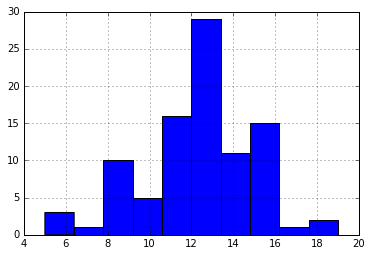

In [194]:
df.men.hist()

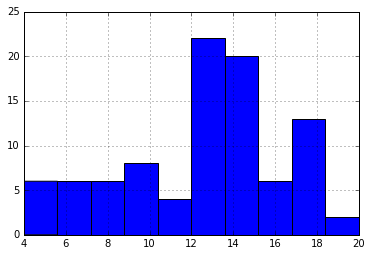

In [195]:
df.women.hist()

Some more analysis by boxplot shows that the distribution for women is slightly skewed. That's why the median and the mean are actually not as close for the case of men.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11c4ca550>,
 'caps': [<matplotlib.lines.Line2D at 0x11c4d9310>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c4f5610>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c4d9f90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11bc36290>,
  <matplotlib.lines.Line2D at 0x11c4968d0>]}

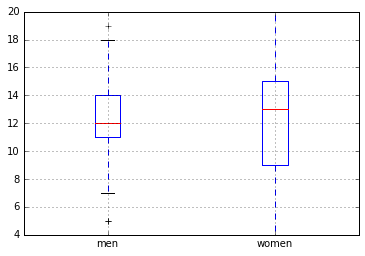

In [200]:
df.boxplot(column=['men','women'])

In [10]:
gdp = pd.read_csv('/Users/Chang/Projects/Thinkful_project_12/world_bank_data/gdp.csv',usecols=["Country Name","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"])

In [14]:
gdp.shape

(248, 13)

In [45]:
gdp.head(50)

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Name,,,,,,,,,,,,
Aruba,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09
Andorra,1.239840e+09,1.401694e+09,1.484005e+09,1.717564e+09,2.373836e+09,2.916913e+09,3.248135e+09,3.536452e+09,4.010785e+09,4.001349e+09,3.649863e+09,3.346317e+09
Afghanistan,NaN,NaN,2.461666e+09,4.128818e+09,4.583649e+09,5.285462e+09,6.275076e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10
Angola,6.152937e+09,9.129635e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.315789e+10,8.336948e+10
Albania,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10
Arab World,6.400589e+11,7.307833e+11,7.191132e+11,7.248545e+11,8.181213e+11,9.594787e+11,1.179756e+12,1.398632e+12,1.638681e+12,2.077554e+12,1.795604e+12,2.099996e+12
United Arab Emirates,8.444547e+10,1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,1.806170e+11,2.221059e+11,2.579161e+11,3.154746e+11,2.535474e+11,2.860493e+11
Argentina,2.835230e+11,2.842038e+11,2.686968e+11,9.772451e+10,1.275863e+11,1.818731e+11,2.208138e+11,2.626665e+11,3.293175e+11,4.037820e+11,3.766279e+11,4.616402e+11
Armenia,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,3.576615e+09,4.900470e+09,6.384452e+09,9.206302e+09,1.166204e+10,8.647937e+09,9.260285e+09


In [21]:
gdp.columns

Index([u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006',
       u'2007', u'2008', u'2009', u'2010'],
      dtype='object')

In [16]:
gdp.set_index('Country Name',inplace=True)

In [22]:
df['gdp']=np.random.randn(len(df))

In [26]:
df.reset_index(inplace=True)

In [30]:
df = df.drop(labels='index',axis=1)

In [37]:
ls = gdp.index
for i in range(len(df)):
    country = df.loc[i,'country']
    year = df.loc[i,'year']
    if country in ls:
        df.loc[i,'gdp']=gdp.loc[country,year]
    else:
        df.loc[i,'gdp']=1

In [40]:
df.gdp = np.log(df.gdp)

In [41]:
df.head(100)

,country,year,total,men,women,gdp
0,Afghanistan,2004,8.0,11.0,5.0,22.388226
1,Albania,2004,11.0,11.0,11.0,22.713174
2,Algeria,2005,13.0,13.0,13.0,25.359918
3,Andorra,2008,11.0,11.0,12.0,22.109897
4,Anguilla,2008,11.0,11.0,11.0,0.000000
5,Austria,2008,15.0,15.0,15.0,26.781481
6,Azerbaijan,2008,13.0,13.0,13.0,24.612071
7,Bahrain,2006,14.0,14.0,15.0,23.641310
8,Bangladesh,2007,8.0,8.0,8.0,25.100429
9,Belarus,2007,15.0,14.0,15.0,24.536037


In [42]:
df_new = df[df.gdp != 0]

In [43]:
df_new.head(100)

,country,year,total,men,women,gdp
0,Afghanistan,2004,8.0,11.0,5.0,22.388226
1,Albania,2004,11.0,11.0,11.0,22.713174
2,Algeria,2005,13.0,13.0,13.0,25.359918
3,Andorra,2008,11.0,11.0,12.0,22.109897
5,Austria,2008,15.0,15.0,15.0,26.781481
6,Azerbaijan,2008,13.0,13.0,13.0,24.612071
7,Bahrain,2006,14.0,14.0,15.0,23.641310
8,Bangladesh,2007,8.0,8.0,8.0,25.100429
9,Belarus,2007,15.0,14.0,15.0,24.536037
11,Bosnia and Herzegovina,2009,14.0,13.0,14.0,23.571941


In [44]:
df.corr()

,total,men,women,gdp
total,1.000000,0.968550,0.973982,0.102992
men,0.968550,1.000000,0.927088,0.125666
women,0.973982,0.927088,1.000000,0.044304
gdp,0.102992,0.125666,0.044304,1.000000
